# Credit Risk Prediction

## Import Modul

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Import Dataset

In [2]:
loan_data = pd.read_csv('C:\project\loan_dataset.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Understanding

In [3]:
loan_data.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


## Data Pre-Processing

In [5]:
object_data = loan_data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Status']]
d=[]
for i in object_data:
    loan_data[i].fillna(loan_data[i].mode()[0], inplace=True)
    d.append(loan_data[i].unique())
print(d)

[array(['Male', 'Female'], dtype=object), array(['No', 'Yes'], dtype=object), array(['0', '1', '2', '3+'], dtype=object), array(['Graduate', 'Not Graduate'], dtype=object), array(['No', 'Yes'], dtype=object), array(['Y', 'N'], dtype=object)]


In [6]:
float_data = loan_data[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
e = []
for i in float_data:
    loan_data[i].fillna(loan_data[i].mean(), inplace=True)
    e.append(loan_data[i].unique())
    print(e)

[array([142.5115304, 128.       ,  66.       , 120.       , 141.       ,
       267.       ,  95.       , 158.       , 168.       , 349.       ,
        70.       , 109.       , 200.       , 114.       ,  17.       ,
       125.       , 100.       ,  76.       , 133.       , 115.       ,
       104.       , 315.       , 116.       , 112.       , 151.       ,
       191.       , 122.       , 110.       ,  35.       , 201.       ,
        74.       , 106.       , 320.       , 144.       , 184.       ,
        80.       ,  47.       ,  75.       , 134.       ,  96.       ,
        88.       ,  44.       , 286.       ,  97.       , 135.       ,
       180.       ,  99.       , 165.       , 258.       , 126.       ,
       312.       , 136.       , 172.       ,  81.       , 187.       ,
       113.       , 176.       , 130.       , 111.       , 167.       ,
       265.       ,  50.       , 210.       , 175.       , 131.       ,
       188.       ,  25.       , 137.       , 160.       , 225.

In [7]:
loan_data.drop(columns=['Loan_ID'], inplace=True)

In [8]:
loan_data['Income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']

loan_data['Income'].describe()

count      981.000000
mean      6781.711437
std       6023.952550
min       1442.000000
25%       4166.000000
50%       5314.000000
75%       7308.000000
max      81000.000000
Name: Income, dtype: float64

In [9]:
total_income_bins = [0, 4000, 7500, float('inf')]
total_income_labels = ['Low', 'Middle', 'High']

loan_data['total_income'] = pd.cut(loan_data['Income'], bins=total_income_bins,
                                     labels=total_income_labels, right=False, include_lowest=True)

loan_data['total_income'].value_counts()

Middle    531
High      229
Low       221
Name: total_income, dtype: int64

In [10]:
loan_data['Loan_Amount_Term'].describe()

count    981.000000
mean     342.201873
std       64.432886
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [11]:
loan_data['LoanAmount'].describe()

count    981.00000
mean     142.51153
std       76.34777
min        9.00000
25%      101.00000
50%      128.00000
75%      160.00000
max      700.00000
Name: LoanAmount, dtype: float64

In [12]:
total_term_bins = [0, 240, 361, float('inf')]
total_term_labels = ['Low', 'Middle', 'High']

loan_data['Term'] = pd.cut(loan_data['Loan_Amount_Term'], bins=total_term_bins,
                                     labels=total_term_labels, right=False, include_lowest=True)

loan_data['Term'].value_counts()

Middle    872
Low        86
High       23
Name: Term, dtype: int64

In [13]:
def create_category(row):
    if (row['Dependents'] =='2' and row['Term'] =='Middle') or (row['Dependents'] =='+3' and row['Term'] =='Middle'):
        if row['Loan_Status'] =='Y':
            if row['LoanAmount'] > 128.00000:
                return 'High'
    else:
        return 'Low'
    
loan_data['Risk'] = loan_data.apply(create_category, axis=1)

In [14]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income,total_income,Term,Risk
0,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,5849.0,Middle,Middle,Low
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,6091.0,Middle,Middle,Low
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,3000.0,Low,Middle,Low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,4941.0,Middle,Middle,Low
4,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,6000.0,Middle,Middle,Low


<AxesSubplot:xlabel='Risk', ylabel='count'>

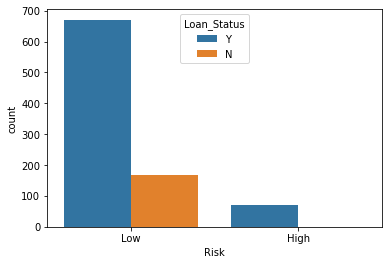

In [15]:
sns.countplot(x=loan_data['Risk'], hue=loan_data['Loan_Status'], data=loan_data['Risk'])

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
all_feats = list(loan_data.columns)

# Create function to handle separation

def sep_cat_num(list_name):
    categoricals = []
    numericals = []
    for col in list_name:
        if loan_data[col].dtype != 'object':
            numericals.append(col)
        else:
            categoricals.append(col)
    
    return categoricals, numericals

# Creating separate list for both categorical and numerical variables
categorical_feats, num_feats = sep_cat_num(all_feats)



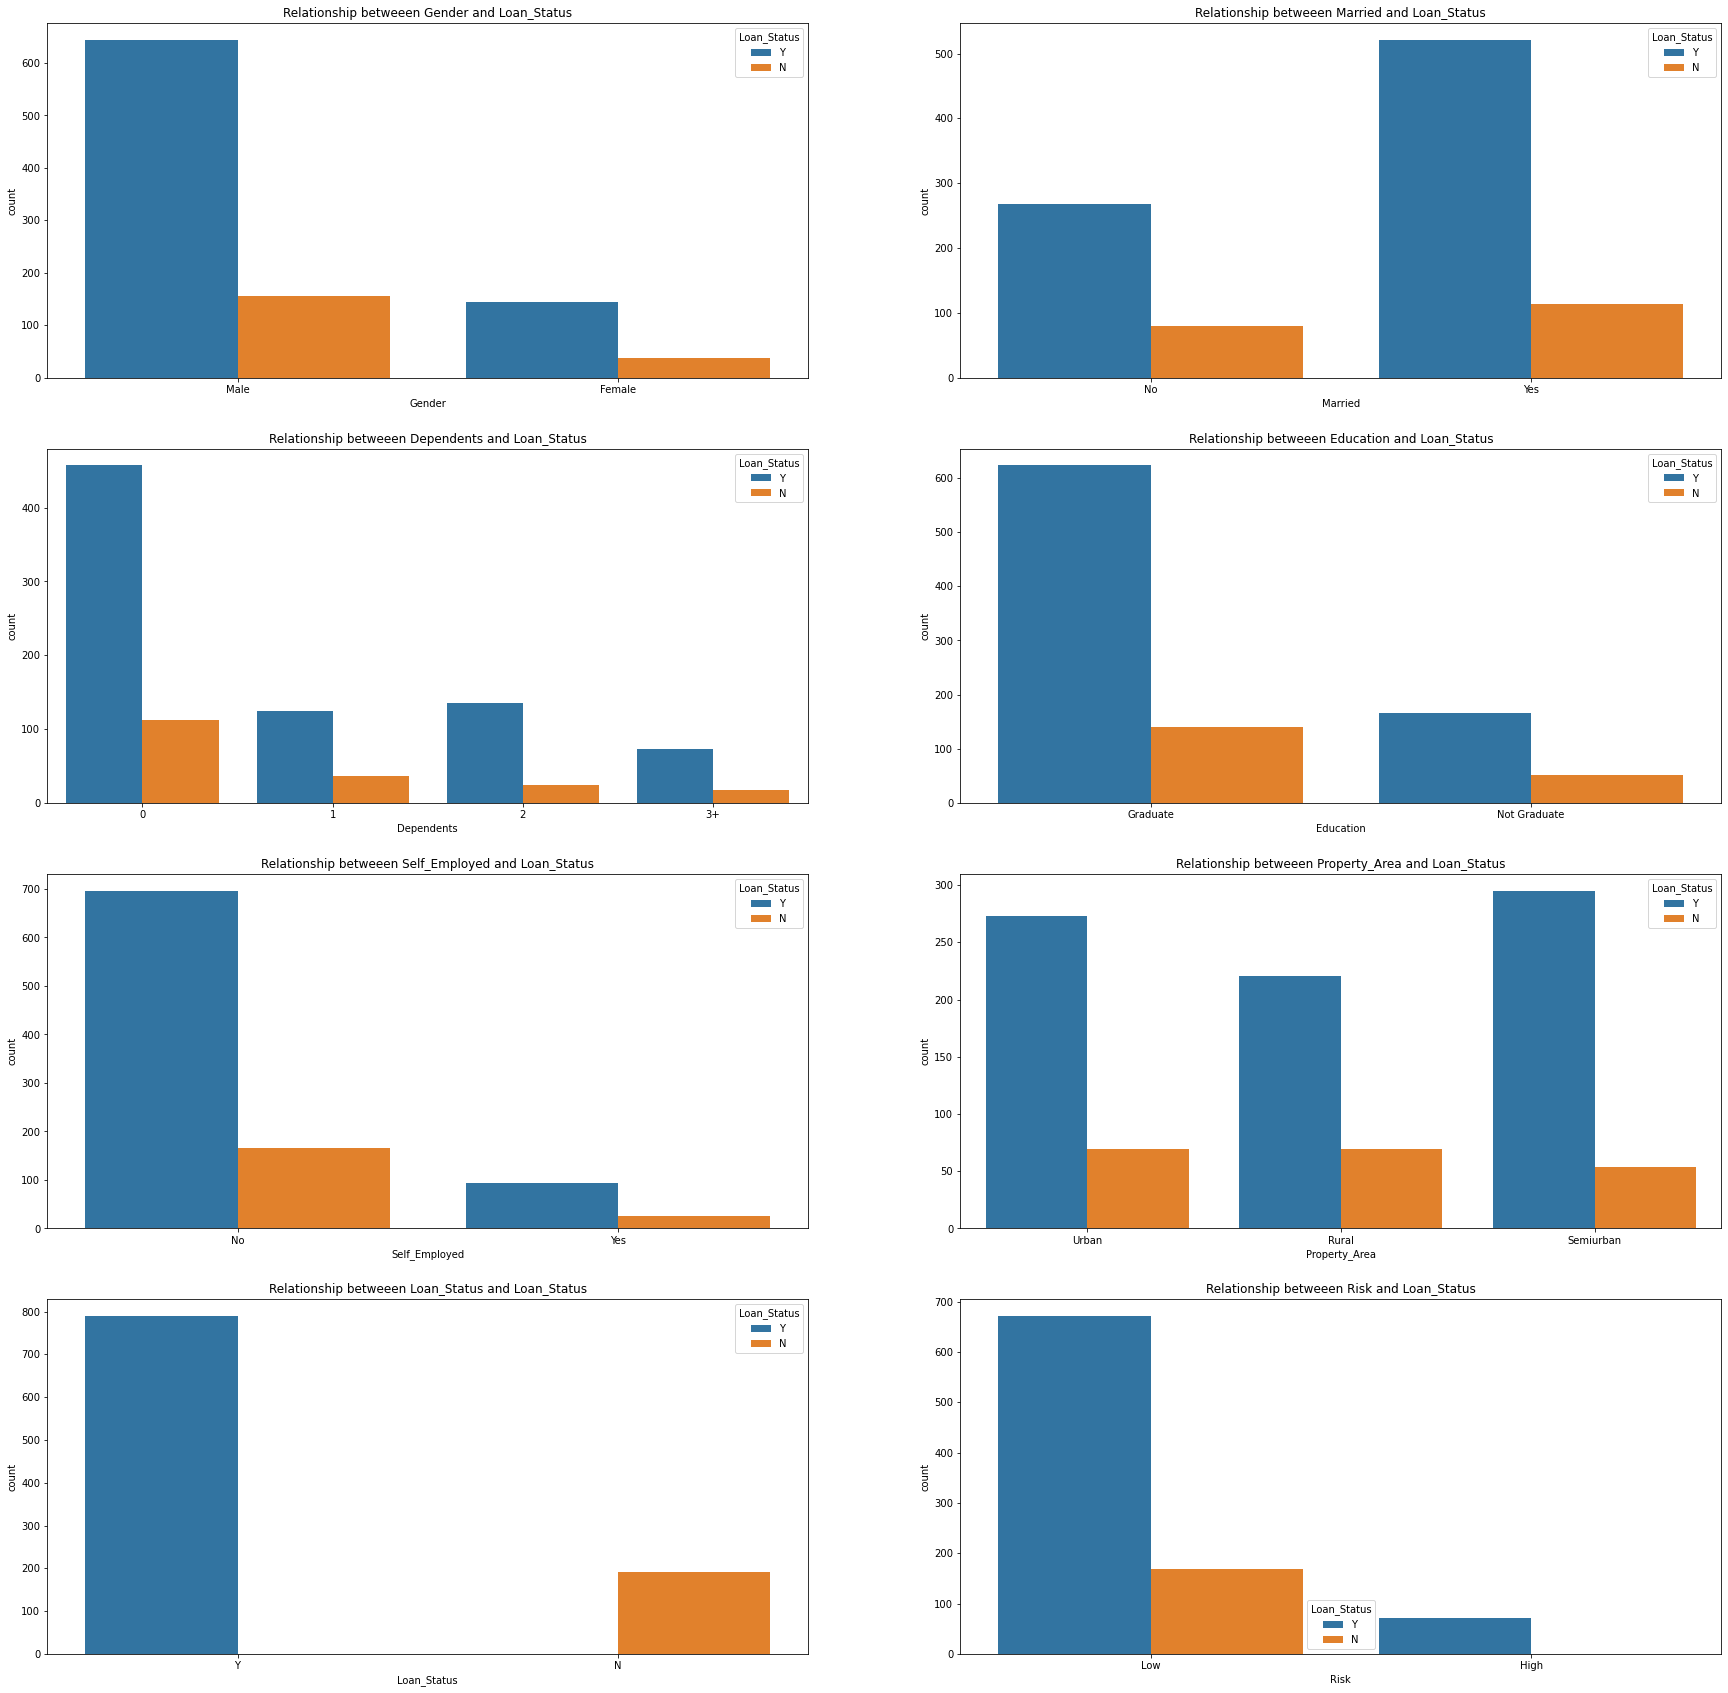

In [17]:
fig, axes = plt.subplots(4, 2, figsize=(30, 30))

# Plot each column in a loop
for idx, column in enumerate(categorical_feats):
    row = idx // 2
    col = idx % 2
    sns.countplot(x=column, hue=loan_data['Loan_Status'], data=loan_data, 
                  ax=axes[row, col])
    axes[row, col].set_title(f"Relationship betweeen {column} and Loan_Status")


plt.show()


In [18]:
for j in categorical_feats:
    loan_data[j]= label_encoder.fit_transform(loan_data[j])

In [19]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income,total_income,Term,Risk
0,1,0,0,0,0,5849,0.0,142.51153,360.0,1.0,2,1,5849.0,Middle,Middle,1
1,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,0,6091.0,Middle,Middle,1
2,1,1,0,0,1,3000,0.0,66.00000,360.0,1.0,2,1,3000.0,Low,Middle,1
3,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1,4941.0,Middle,Middle,1
4,1,0,0,0,0,6000,0.0,141.00000,360.0,1.0,2,1,6000.0,Middle,Middle,1


In [20]:
from scipy import stats

loan_data['total_income']= label_encoder.fit_transform(loan_data['total_income'])
loan_data['Term']= label_encoder.fit_transform(loan_data['Term'])
# Assuming 'data' is your DataFrame
z_scores = np.abs(stats.zscore(loan_data))
outliers = (z_scores > 3).all(axis=1)
data_clean = loan_data[~outliers]

<AxesSubplot:>

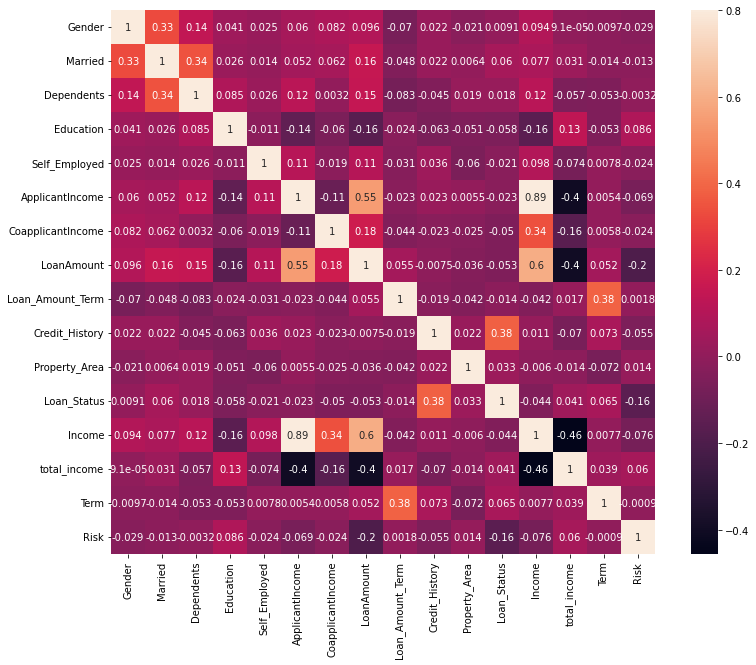

In [21]:
# Using a correlation matrix
corr_mat = data_clean.corr()

f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corr_mat, vmax=.8, annot=True, square=True)

## Modelling

In [34]:
train_data = data_clean

from sklearn.model_selection import train_test_split
y = train_data['Risk']
X = train_data.drop(columns = ['Risk'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state = 42)

In [24]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

print('Accuracy=',accuracy)

Accuracy= 0.9847328244274809


In [36]:
decisiontree = GaussianNB()

# Train the classifier on the training data
decisiontree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = decisiontree.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy=',accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy= 0.9694656488549618
[[ 16   5   3]
 [  0 339   0]
 [  2   2  26]]


In [37]:
model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test1)

# Evaluate the model
accuracy = accuracy_score(y_test1, y_pred)
print('Accuracy=',accuracy)
conf_matrix = confusion_matrix(y_test1, y_pred)
print(conf_matrix)

Accuracy= 0.88
[[ 0  2  0]
 [ 0 21  0]
 [ 0  1  1]]
